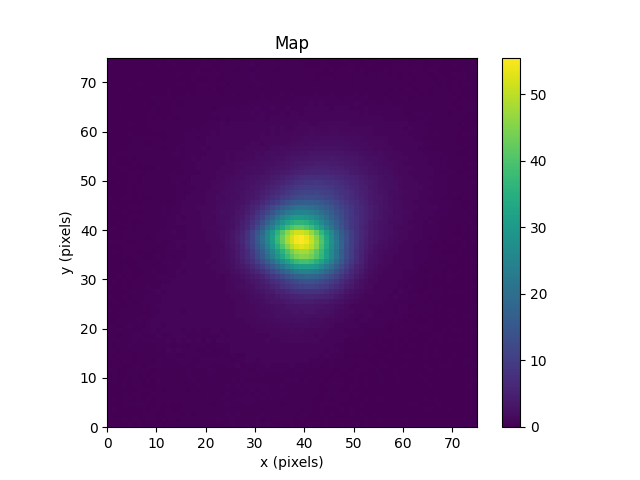

In [31]:
from Code_utilities.BeamAnalysis import BeamAnalysis
%matplotlib widget

HIKMICRO_dir_path = '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250616/HIKMICRO/Power Series'
filename = '80 degrees.csv'
x_center_HIKMICRO = 138
y_center_HIKMICRO = 107
width = 75
measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO =.140 * 3.08
angle_pol_voltage_measurement_HIKMICRO = 70
moved_pol = 'first'
crop_x_range_HIKMICRO = (x_center_HIKMICRO - width / 2, x_center_HIKMICRO + width / 2)
crop_y_range_HIKMICRO = (y_center_HIKMICRO - width / 2, y_center_HIKMICRO + width / 2)
beam_analysis_HIKMICRO = BeamAnalysis(dir_path=HIKMICRO_dir_path,
                                      signal_filename=filename,
                                      camera_name='HIKMICRO',
                                      crop_range_x_pixels=crop_x_range_HIKMICRO,
                                      crop_range_y_pixels=crop_y_range_HIKMICRO)
fig_HIKMICRO, ax_HIKMICRO = beam_analysis_HIKMICRO.plot_map_in_pixels()

In [32]:

from Code_utilities.SeriesAnalyzer_2 import SeriesAnalyzer_2
%matplotlib widget

HIKMICRO_dir_path =  '/Users/Shared/Files From c.localized/Gabriel_UniBern_Local/DataAnalysis/Low cost THz Camera/20250616/HIKMICRO/Power Series'

HIKMICRO_SeriesAnalyzer = SeriesAnalyzer_2(dir_path=HIKMICRO_dir_path,
                                           camera_name='HIKMICRO',
                                           Y_ref_position_for_background_subtraction=10,
                                           crop_range_x_pixels=crop_x_range_HIKMICRO,
                                           crop_range_y_pixels=crop_y_range_HIKMICRO)

beam_characterization_df_HIKMICRO = HIKMICRO_SeriesAnalyzer.get_beam_char_df_w_powers(save_data_plot_bool=True,
                                                                                      known_angle=angle_pol_voltage_measurement_HIKMICRO,
                                                                                      kown_voltage_at_known_angle_in_V=measured_voltage_converted_from_lock_in_to_osciloscope_V_HIKMICRO,
                                                                                      moved_polarizer=moved_pol)
beam_characterization_df_HIKMICRO

Moved first polarizer


,FWHM_x (pixels),FWHM_y (pixels),total_intensity,filenames,FWHM_x (um),FWHM_y (um),angle,Power (uW)
0,11.142000,8.694111,242.00,20 degrees,144.846000,113.023444,20.0,0.210679
1,12.192181,10.367440,4953.20,50 degrees,158.498347,134.776714,50.0,1.473557
2,11.708000,9.814057,1710.00,35 degrees,152.204000,127.582743,35.0,0.620533
3,12.095714,10.434023,3610.60,45 degrees,157.244286,135.642293,45.0,1.147623
4,12.049511,10.232844,2770.85,40 degrees,156.643644,133.026978,40.0,0.859889
5,11.910933,9.816466,1094.20,30 degrees,154.842133,127.614053,30.0,0.434022
6,12.230822,10.597355,6103.75,55 degrees,159.000680,137.765614,55.0,1.822283
7,11.395500,9.828333,602.65,25 degrees,148.141500,127.768333,25.0,0.299308
8,12.707964,10.697079,11897.35,85 degrees,165.203537,139.062033,85.0,3.245638
9,1.041667,0.937500,29.25,0 degrees,13.541667,12.187500,0.0,0.122767


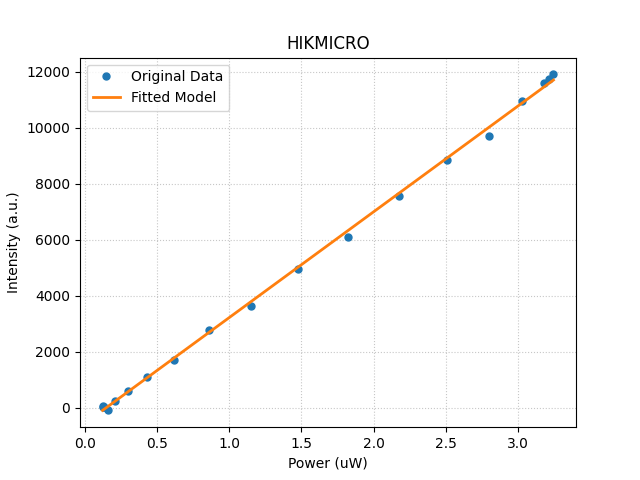

In [35]:
%matplotlib widget
from Code_utilities.DataFitter import DataFitter

beam_characterization_df_HIKMICRO_for_plot = beam_characterization_df_HIKMICRO[
    beam_characterization_df_HIKMICRO['Power (uW)'] <= 10]
fig_fitting_HIKMICRO, ax_fitting_HIKMICRO = DataFitter().plot_data_with_fit(
    x_data=beam_characterization_df_HIKMICRO_for_plot['Power (uW)'],
    y_data=beam_characterization_df_HIKMICRO_for_plot['total_intensity'],
    x_label='Power (uW)',
    y_label='Intensity (a.u.)',
    title='HIKMICRO',
)
fig_fitting_HIKMICRO.savefig('HIKMICRO fitting all power more points.png',)

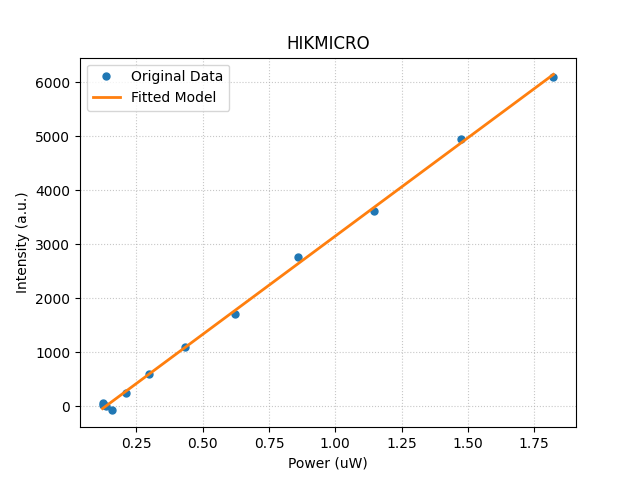

In [34]:
%matplotlib widget
from Code_utilities.DataFitter import DataFitter

beam_characterization_df_HIKMICRO_for_plot = beam_characterization_df_HIKMICRO[
    beam_characterization_df_HIKMICRO['Power (uW)'] <= 2]
fig_fitting_HIKMICRO, ax_fitting_HIKMICRO = DataFitter().plot_data_with_fit(
    x_data=beam_characterization_df_HIKMICRO_for_plot['Power (uW)'],
    y_data=beam_characterization_df_HIKMICRO_for_plot['total_intensity'],
    x_label='Power (uW)',
    y_label='Intensity (a.u.)',
    title='HIKMICRO',
)
fig_fitting_HIKMICRO.savefig('HIKMICRO fitting low power more points.png',
                          dpi=900)